In [1]:
#pip install geopandas
#pip install geoplot

In [24]:
import geopandas as gpd

# Reading the world shapefile
world_data = gpd.read_file(r'/root/world/world.shp')

world_data


,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
...,...,...,...,...,...,...,...,...,...,...,...,...
241,TB,BL,BLM,652,Saint Barthelemy,0,0,19,29,-63.043,18.040,"POLYGON ((-63.02834 18.01555, -63.03334 18.015..."
242,GK,GG,GGY,831,Guernsey,0,0,150,154,-2.576,49.459,"POLYGON ((-2.59083 49.42249, -2.59722 49.42249..."
243,JE,JE,JEY,832,Jersey,0,0,150,154,-2.129,49.219,"POLYGON ((-2.01500 49.21416, -2.02111 49.17722..."
244,SX,GS,SGS,239,South Georgia South Sandwich Islands,0,0,0,0,-36.891,-54.209,"MULTIPOLYGON (((-27.32584 -59.42722, -27.29806..."


<Axes: >

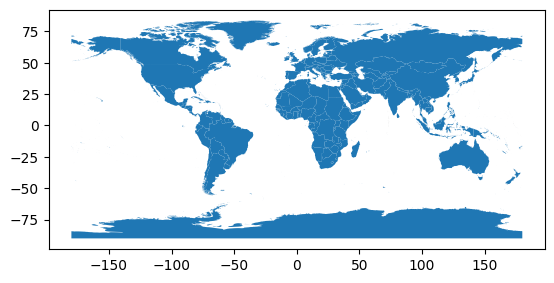

In [25]:
world_data.plot()

In [26]:
world_data = world_data[['NAME', 'geometry']]
world_data

,NAME,geometry
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
...,...,...
241,Saint Barthelemy,"POLYGON ((-63.02834 18.01555, -63.03334 18.015..."
242,Guernsey,"POLYGON ((-2.59083 49.42249, -2.59722 49.42249..."
243,Jersey,"POLYGON ((-2.01500 49.21416, -2.02111 49.17722..."
244,South Georgia South Sandwich Islands,"MULTIPOLYGON (((-27.32584 -59.42722, -27.29806..."


In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
# Calculating the area of each country
# Project the GeoDataFrame onto a CRS that takes into account the curvature of the earth
world_data = world_data.to_crs('EPSG:4326')

# Calculate the area of each polygon in the GeoDataFrame
world_data['area'] = world_data.geometry.area

world_data

,NAME,geometry,area
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",0.046183
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",213.512502
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",9.100912
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",3.075918
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",3.142093
...,...,...,...
241,Saint Barthelemy,"POLYGON ((-63.02834 18.01555, -63.03334 18.015...",0.004696
242,Guernsey,"POLYGON ((-2.59083 49.42249, -2.59722 49.42249...",0.009359
243,Jersey,"POLYGON ((-2.01500 49.21416, -2.02111 49.17722...",0.015408
244,South Georgia South Sandwich Islands,"MULTIPOLYGON (((-27.32584 -59.42722, -27.29806...",0.542074


<Axes: >

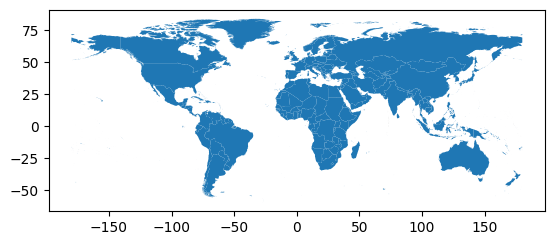

In [29]:
# Removing Antarctica from GeoPandas GeoDataframe
world_data = world_data[world_data['NAME'] != 'Antarctica']
world_data.plot()

<Axes: >

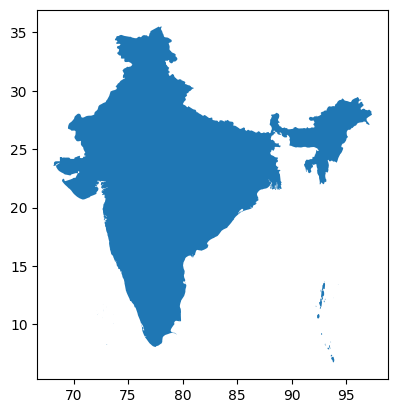

In [30]:
#plot country india
world_data[world_data.NAME=="India"].plot()

In [33]:
#The same CRS can often be referred to in many ways. For example, one of the most commonly used CRS is the WGS84 latitude-longitude projection.
#This can be referred to using the authority code "EPSG:4326".

#A CRS tells Python how those coordinates relate to places on the Earth.

<Axes: >

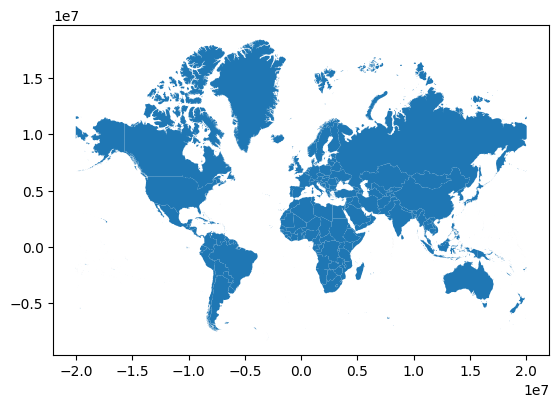

In [32]:
# Changing the projection
current_crs = world_data.crs
world_data.to_crs(epsg=3857, inplace=True)
  
world_data.plot()

<Axes: >

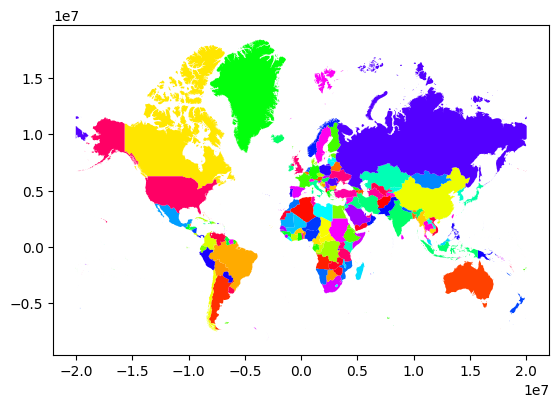

In [34]:
#We can color each country in the world using a head column and cmap.
world_data.plot(column='NAME', cmap='hsv')

<Axes: >

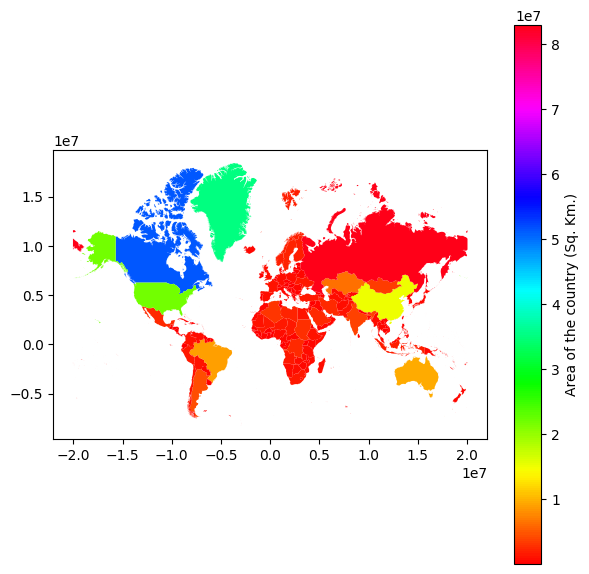

In [35]:
#Next, we are going to convert the area in sq. km by dividing it to 10^6 i.e (1000000).
# Re-calculate the areas in Sq. Km.
world_data['area'] = world_data.area/1000000
  
# Adding a legend
world_data.plot(column='area', cmap='hsv', legend=True,
                legend_kwds={'label': "Area of the country (Sq. Km.)"}, 
                figsize=(7, 7))

<Axes: >

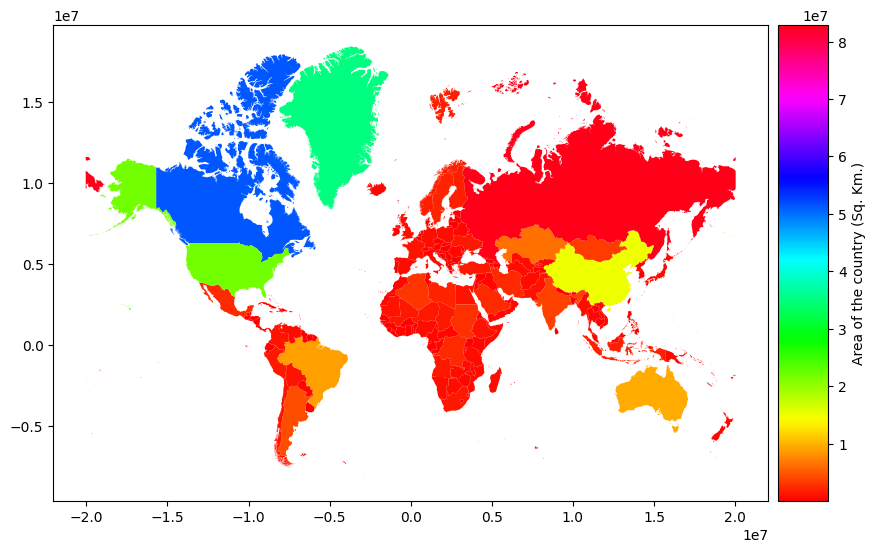

In [37]:
#We can also resize the legend using ax and cax arguments of plot(). 
#ax: matplotlib.pyplot. Artist (default None). axes on which to draw the plot.
#cax: matplotlib.pyplot Artist (default None). axes on which to draw the legend in case of color map.
# Resizing the legend
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(10, 10))
divider = make_axes_locatable(ax)
  
cax = divider.append_axes("right", size="7%", pad=0.1)
world_data.plot(column='area', cmap='hsv', legend=True,
                legend_kwds={'label': "Area of the country (Sq. Km.)"},
                ax=ax, cax=cax)